<a href="https://colab.research.google.com/github/CaduPortifolio/An-lise/blob/main/Mod9Tarefa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [6]:
print(sinasc_raw.dtypes)

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object


In [7]:
sinasc_raw.select_dtypes(include=['number']).columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
# Definir as faixas de latitude e aplicar o groupby
bins = [-float('inf'), -10.5, float('inf')]
sinasc_raw['Lat_Faixa'] = pd.cut(sinasc_raw['munResLat'], bins)

# Agregar os dados
result = sinasc_raw.groupby('Lat_Faixa').agg({
    'CONSULTAS': [('Soma','sum'), ('Média','mean'), ('Mínimo', 'min'), ('Máximo','max'), ('Mediana','median'), ('Descio padrão','std'), ('Variância','var')],
    'QTDGESTANT': [('Soma','sum'), ('Média','mean'), ('Mínimo', 'min'), ('Máximo','max'), ('Mediana','median'), ('Descio padrão','std'), ('Variância','var')]
})

# Exibir o resultado
result

<ipython-input-8-cc637d279505>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = sinasc_raw.groupby('Lat_Faixa').agg({


CONSULTAS                                                \
                   Soma     Média Mínimo Máximo Mediana Descio padrão   
Lat_Faixa                                                               
(-inf, -10.5]     48000  3.694297      1      9     4.0      0.643372   
(-10.5, inf]      48662  3.467436      1      9     4.0      0.888240   

                        QTDGESTANT                                  \
              Variância       Soma     Média Mínimo Máximo Mediana   
Lat_Faixa                                                            
(-inf, -10.5]  0.413928    15301.0  1.186032    0.0   15.0     1.0   
(-10.5, inf]   0.788970    17615.0  1.364024    0.0   52.0     1.0   

                                       
              Descio padrão Variância  
Lat_Faixa                              
(-inf, -10.5]      1.304777  1.702444  
(-10.5, inf]       1.492482  2.227501

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:


# Definir as faixas de área dos municípios
bins = [-float('inf'), 3000, float('inf')]
labels = ['<= 3000', '> 3000']
sinasc_raw['Area_Faixa'] = pd.cut(sinasc_raw['munResArea'], bins=bins, labels=labels)

# Agrupar o DataFrame pela faixa de área E APLICANDO agregações
grouped = sinasc_raw.groupby('Area_Faixa').agg({
    'APGAR1': [('Soma','sum'), ('Média','mean'), ('Mínimo', 'min'), ('Máximo','max'), ('Mediana','median'), ('Descio padrão','std'), ('Variância','var')],
    'APGAR5': [('Soma','sum'), ('Média','mean'), ('Mínimo', 'min'), ('Máximo','max'), ('Mediana','median'), ('Descio padrão','std'), ('Variância','var')]
    })

grouped

<ipython-input-9-9d9182d062bc>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sinasc_raw.groupby('Area_Faixa').agg({


APGAR1                                                          \
                Soma     Média Mínimo Máximo Mediana Descio padrão Variância   
Area_Faixa                                                                     
<= 3000      42070.0  8.073306    0.0   10.0     8.0      1.008790  1.017658   
> 3000      177079.0  8.152808    0.0   10.0     8.0      0.978517  0.957495   

              APGAR5                                                          
                Soma     Média Mínimo Máximo Mediana Descio padrão Variância  
Area_Faixa                                                                    
<= 3000      47560.0  9.130351    0.0   10.0     9.0      0.801124  0.641799  
> 3000      199579.0  9.190836    0.0   10.0     9.0      0.787591  0.620299

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [18]:
# Aplicar as operações de agregação
result3 = sinasc_raw.groupby('munResAlt').agg({
    'ESCMAE2010': [('Soma','sum'), ('Média','mean'), ('Mínimo', 'min'), ('Máximo','max'), ('Mediana','median'), ('Descio padrão','std'), ('Variância','var')],
    'SERIESCMAE': [('Soma','sum'), ('Média','mean'), ('Mínimo', 'min'), ('Máximo','max'), ('Mediana','median'), ('Descio padrão','std'), ('Variância','var')]
})
result3.head(5)

ESCMAE2010                                                          \
                Soma     Média Mínimo Máximo Mediana Descio padrão Variância   
munResAlt                                                                      
85.0           905.0  2.717718    1.0    9.0     3.0      1.011181  1.022486   
87.0         25616.0  3.088125    0.0    9.0     3.0      1.118739  1.251577   
99.0           285.0  2.638889    1.0    9.0     2.0      1.097647  1.204829   
111.0          570.0  2.794118    1.0    9.0     3.0      0.970889  0.942625   
124.0          139.0  2.836735    1.0    5.0     3.0      0.986301  0.972789   

          SERIESCMAE                                                          
                Soma     Média Mínimo Máximo Mediana Descio padrão Variância  
munResAlt                                                                     
85.0           742.0  4.496970    1.0    8.0     4.0      2.403311  5.775905  
87.0         14458.0  4.476161    1.0    8.0     4.0      2.478502  6.142974  
99.0           256.0  5.565217    1.0    8.0     6.0      2.083290  4.340097  
111.0          129.0  4.448276    1.0    8.0     4.0      2.640160  6.970443  
124.0           15.0  3.750000    2.0    7.0     3.0      2.217356  4.916667

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [19]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [12]:
sinasc2 = sinasc_raw.set_index('munResNome')

In [13]:
sinasc2.groupby(imediatas)['IDADEMAE'].mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


Gráfico

<Axes: xlabel='Município Residencial da mãe', ylabel='Média de idade das mães'>

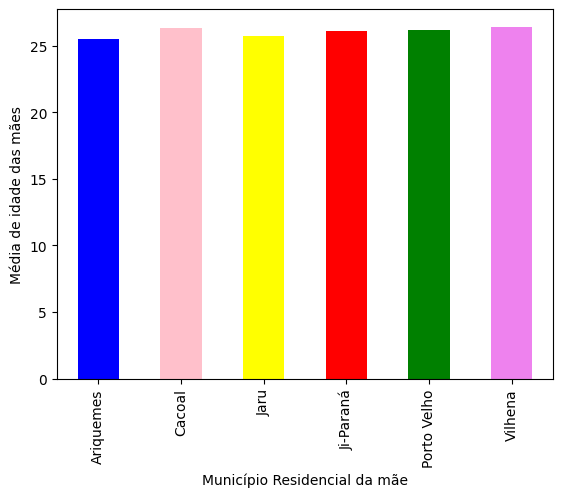

In [14]:
sinasc2.groupby(imediatas)['IDADEMAE'].mean().plot(kind='bar', color=['blue', 'pink', 'yellow', 'red', 'green', 'violet'], xlabel='Município Residencial da mãe', ylabel='Média de idade das mães')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [15]:
idh = {
    "Porto Velho": "Alto",
    "Vilhena": "Alto",
    "Cacoal": "Alto",
    "Ji-Paraná": "Alto",
    "Pimenta Bueno": "Alto",
    "Ariquemes": "Alto",
    "Rolim de Moura": "Alto",
    "Cerejeiras": "médio",
    "Jaru": "médio",
    "Colorado do Oeste": "médio",
    "Ouro Preto do Oeste": "médio",
    "Espigão d'Oeste": "médio",
    "Santa Luzia d'Oeste": "médio",
    "Pimenteiras do Oeste": "médio",
    "Presidente Médici": "médio",
    "Castanheiras": "médio",
    "Guajará-Mirim": "médio",
    "Chupinguaia": "médio",
    "Cabixi": "médio",
    "Candeias do Jamari": "médio",
    "São Felipe d'Oeste": "médio",
    "Cacaulândia": "médio",
    "São Miguel do Guaporé": "médio",
    "Mirante da Serra": "médio",
    "Alvorada d'Oeste": "médio",
    "Teixeirópolis": "médio",
    "Nova Brasilândia d'Oeste": "médio",
    "Rio Crespo": "médio",
    "Primavera de Rondônia": "médio",
    "Alta Floresta d'Oeste": "médio",
    "Ministro Andreazza": "médio",
    "Novo Horizonte do Oeste": "médio",
    "Vale do Paraíso": "médio",
    "Alto Paraíso": "médio",
    "Parecis": "médio",
    "Buritis": "médio",
    "Itapuã do Oeste": "médio",
    "Corumbiara": "médio",
    "Cujubim": "médio",
    "Costa Marques": "médio",
    "São Francisco do Guaporé": "médio",
    "Urupá": "médio",
    "Monte Negro": "médio",
    "Seringueiras": "baixo",
    "Governador Jorge Teixeira": "baixo",
    "Machadinho d'Oeste": "baixo",
    "Campo Novo de Rondônia": "baixo",
    "Alto Alegre dos Parecis": "baixo",
    "Theobroma": "baixo",
    "Nova União": "baixo",
    "Nova Mamoré": "baixo",
    "Vale do Anari": "baixo"
}


In [27]:
sinasc2.groupby(idh)['IDADEMAE'].mean()

,IDADEMAE
munResNome,
Alto,26.280332
baixo,25.269231
médio,25.848191


<Axes: xlabel='Níveis de IDH', ylabel='Média de idade das mães'>

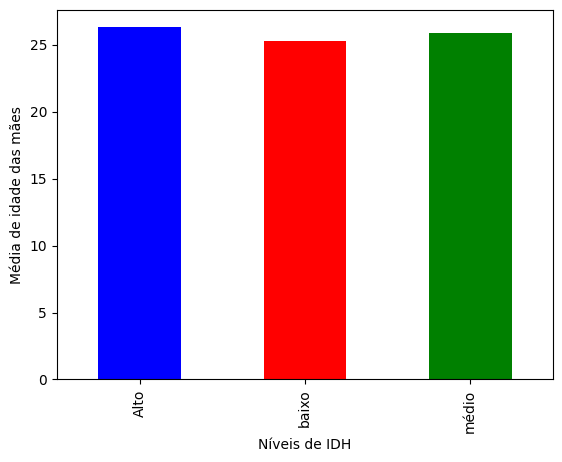

In [23]:
sinasc2.groupby(idh)['IDADEMAE'].mean().plot(kind='bar', color=['blue', 'red', 'green'], xlabel='Níveis de IDH', ylabel='Média de idade das mães')

In [36]:
sinasc2.groupby(idh)['IDADEPAI'].mean()

,IDADEPAI
munResNome,
Alto,31.074091
baixo,30.402332
médio,31.570029


<Axes: xlabel='Níveis de IDH', ylabel='Média de idade dos pais'>

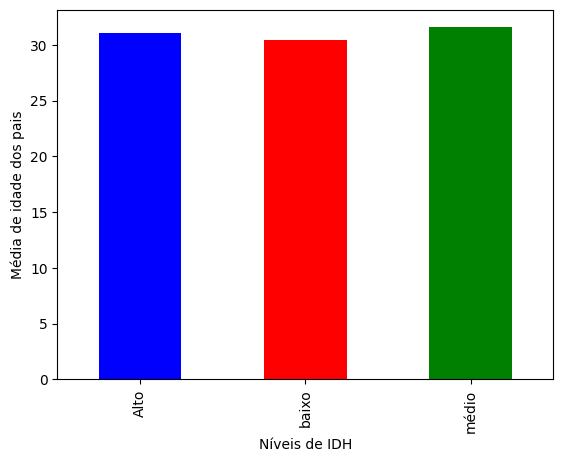

In [29]:
sinasc2.groupby(idh)['IDADEPAI'].mean().plot(kind='bar', color=['blue', 'red', 'green'], xlabel='Níveis de IDH', ylabel='Média de idade dos pais')

In [67]:
sinasc2.groupby([idh, 'SEXO']).count()['DTNASC'].unstack(fill_value=0)

SEXO,Feminino,Masculino
munResNome,,
Alto,8246,8606
baixo,670,656
médio,3298,3611


<Axes: title={'center': 'Contagem de nascidos por sexo no IDH'}, xlabel='IDH', ylabel='Nascidos'>

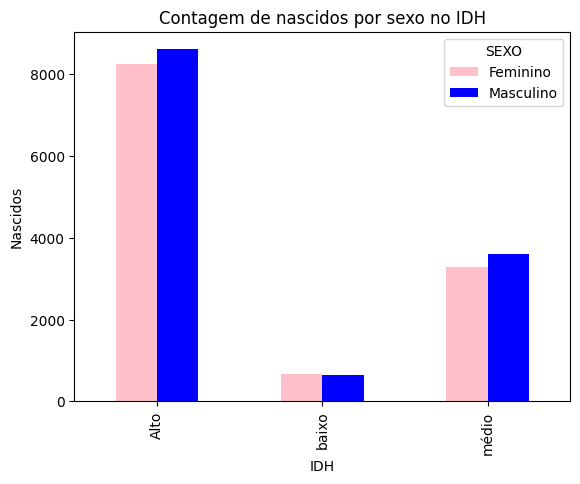

In [68]:
sinasc2.groupby([idh, 'SEXO']).count()['DTNASC'].unstack(fill_value=0).plot(kind='bar', color=['pink', 'blue'], xlabel='IDH', ylabel='Nascidos', title='Contagem de nascidos por sexo no IDH')

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [16]:
IFDM = {
    "Ariquemes": "moderado",
    "Vilhena": "moderado",
    "Pimenta Bueno": "moderado",
    "Porto Velho": "moderado",
    "Ji-Paraná": "moderado",
    "Cacoal": "moderado",
    "Santa Luzia d'Oeste": "moderado",
    "Rolim de Moura": "moderado",
    "Chupinguaia": "moderado",
    "São Miguel do Guaporé": "moderado",
    "Pimenteiras do Oeste": "moderado",
    "Teixeirópolis": "moderado",
    "Colorado do Oeste": "moderado",
    "Jaru": "moderado",
    "Rio Crespo": "moderado",
    "Primavera de Rondônia": "moderado",
    "Alta Floresta d'Oeste": "moderado",
    "Ouro Preto do Oeste": "moderado",
    "São Francisco do Guaporé": "moderado",
    "Candeias do Jamari": "moderado",
    "São Felipe d'Oeste": "moderado",
    "Presidente Médici": "moderado",
    "Cerejeiras": "moderado",
    "Monte Negro": "moderado",
    "Urupá": "moderado",
    "Espigão d'Oeste": "regular",
    "Seringueiras": "regular",
    "Alvorada d'Oeste": "regular",
    "Itapuã do Oeste": "regular",
    "Cabixi": "regular",
    "Novo Horizonte do Oeste": "regular",
    "Nova Brasilândia d'Oeste": "regular",
    "Vale do Paraíso": "regular",
    "Corumbiara": "regular",
    "Alto Paraíso": "regular",
    "Cacaulândia": "regular",
    "Vale do Anari": "regular",
    "Ministro Andreazza": "regular",
    "Costa Marques": "regular",
    "Nova União": "regular",
    "Guajará-Mirim": "regular",
    "Mirante da Serra": "regular",
    "Parecis": "regular",
    "Castanheiras": "regular",
    "Theobroma": "regular",
    "Machadinho d'Oeste": "regular",
    "Campo Novo de Rondônia": "regular",
    "Nova Mamoré": "regular",
    "Cujubim": "regular",
    "Alto Alegre dos Parecis": "regular",
    "Governador Jorge Teixeira": "regular"
}


In [26]:
sinasc2.groupby(IFDM)['IDADEMAE'].mean()

,IDADEMAE
munResNome,
moderado,26.245598
regular,25.412005


<Axes: xlabel='IFDM', ylabel='Média de idade das mães'>

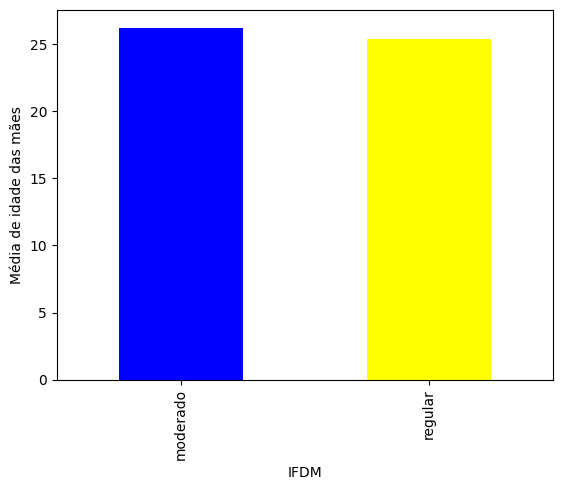

In [24]:
sinasc2.groupby(IFDM)['IDADEMAE'].mean().plot(kind='bar', color=['blue', 'yellow'], xlabel='IFDM', ylabel='Média de idade das mães')

In [35]:
sinasc2.groupby(IFDM)['IDADEPAI'].mean()

,IDADEPAI
munResNome,
moderado,31.148932
regular,31.345297


<Axes: xlabel='IFDM', ylabel='Média de idade dos pais'>

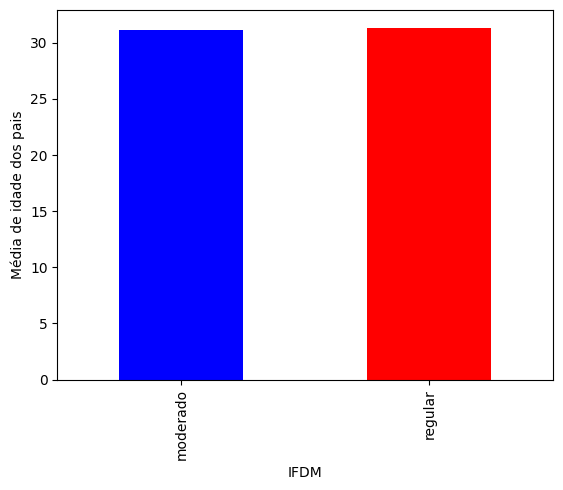

In [31]:
sinasc2.groupby(IFDM)['IDADEPAI'].mean().plot(kind='bar', color=['blue', 'red', 'green'], xlabel='IFDM', ylabel='Média de idade dos pais')

In [65]:
sinasc2.groupby([IFDM, 'SEXO']).count()['DTNASC'].unstack(fill_value=0)

SEXO,Feminino,Masculino
munResNome,,
moderado,10137,10702
regular,1803,1862


<Axes: title={'center': 'Contagem de nascidos por sexo no IFDM'}, xlabel='IFDM', ylabel='Nascidos'>

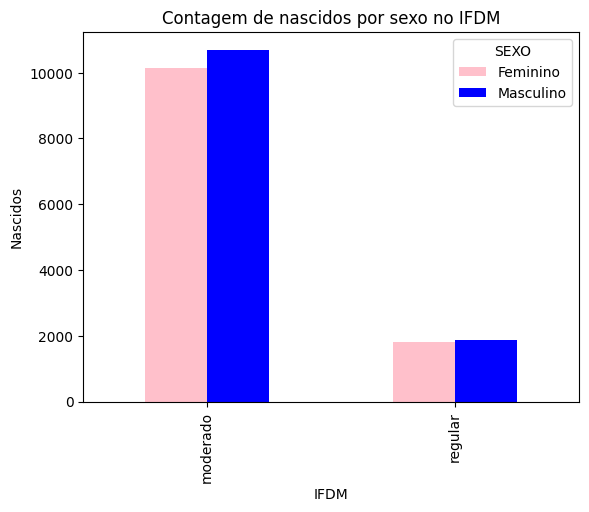

In [69]:
sinasc2.groupby([IFDM, 'SEXO']).count()['DTNASC'].unstack(fill_value=0).plot(kind='bar', color=['pink', 'blue'], xlabel='IFDM', ylabel='Nascidos', title='Contagem de nascidos por sexo no IFDM')

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [17]:
PIB = {
    "Porto Velho": "acima de 1 bi",
    "Ji-Paraná": "acima de 1 bi",
    "Vilhena": "acima de 1 bi",
    "Ariquemes": "acima de 1 bi",
    "Cacoal": "acima de 1 bi",
    "Jaru": "acima de 1 bi",
    "Rolim de Moura": "acima de 1 bi",
    "Pimenta Bueno": "acima de 1 bi",
    "Guajará-Mirim": "acima de 500 milhões",
    "Ouro Preto do Oeste": "acima de 500 milhões",
    "Buritis": "acima de 500 milhões",
    "Machadinho do Oeste": "acima de 500 milhões",
    "Espigão d'Oeste": "acima de 500 milhões",
    "São Miguel do Guaporé": "acima de 500 milhões",
    "Candeias do Jamari": "acima de 500 milhões",
    "Nova Mamoré": "acima de 500 milhões",
    "Cerejeiras": "acima de 500 milhões",
    "Alta Floresta do Oeste": "acima de 300 milhões",
    "Presidente Médici": "acima de 300 milhões",
    "Cujubim": "acima de 300 milhões",
    "Nova Brasilândia do Oeste": "acima de 300 milhões",
    "Alto Paraíso": "acima de 300 milhões",
    "São Francisco do Guaporé": "acima de 300 milhões",
    "Colorado do Oeste": "acima de 300 milhões",
    "Monte Negro": "acima de 200 milhões",
    "Alto Alegre dos Parecis": "acima de 200 milhões",
    "Campo Novo de Rondônia": "acima de 200 milhões",
    "Alvorada do Oeste": "acima de 200 milhões",
    "Chupinguaia": "acima de 100 milhões",
    "Corumbiara": "acima de 100 milhões",
    "Ministro Andreazza": "acima de 100 milhões",
    "Urupá": "acima de 100 milhões",
    "Costa Marques": "acima de 100 milhões",
    "Seringueiras": "acima de 100 milhões",
    "Mirante da Serra": "acima de 100 milhões",
    "Governador Jorge Teixeira": "acima de 100 milhões",
    "Theobroma": "acima de 100 milhões",
    "Santa Luzia do Oeste": "acima de 100 milhões",
    "Novo Horizonte do Oeste": "acima de 100 milhões",
    "Itapuã do Oeste": "acima de 100 milhões",
    "Vale do Paraíso": "acima de 100 milhões",
    "Cacaulândia": "acima de 100 milhões",
    "Cabixi": "acima de 100 milhões",
    "Vale do Anari": "acima de 100 milhões",
    "Nova União": "até 100 milhões",
    "Parecis": "até 100 milhões",
    "Rio Crespo": "até 100 milhões",
    "Pimenteiras do Oeste": "até 100 milhões",
    "Teixeirópolis": "até 100 milhões",
    "São Felipe do Oeste": "até 100 milhões",
    "Castanheiras": "até 100 milhões",
    "Primavera de Rondônia": "até 100 milhões"
}


In [34]:
sinasc2.groupby(PIB)['IDADEMAE'].mean()

,IDADEMAE
munResNome,
acima de 1 bi,26.265562
acima de 100 milhões,25.638424
acima de 200 milhões,25.146435
acima de 300 milhões,25.706070
acima de 500 milhões,25.785927
até 100 milhões,26.519894


<Axes: xlabel='PIB Municipal', ylabel='Média de idade das mães'>

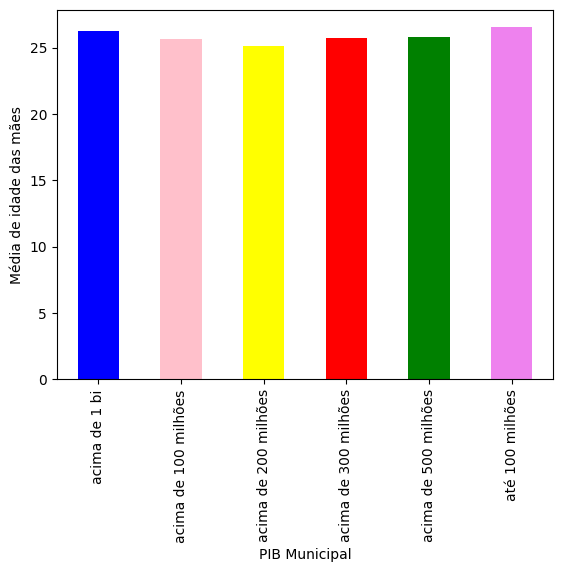

In [25]:
sinasc2.groupby(PIB)['IDADEMAE'].mean().plot(kind='bar', color=['blue', 'pink', 'yellow', 'red', 'green', 'violet'], xlabel='PIB Municipal', ylabel='Média de idade das mães')

In [33]:
sinasc2.groupby(PIB)['IDADEPAI'].mean()

,IDADEPAI
munResNome,
acima de 1 bi,31.108387
acima de 100 milhões,31.744348
acima de 200 milhões,30.187500
acima de 300 milhões,30.819149
acima de 500 milhões,31.381955
até 100 milhões,31.626126


<Axes: xlabel='PIB Municipal', ylabel='Média de idade dos pais'>

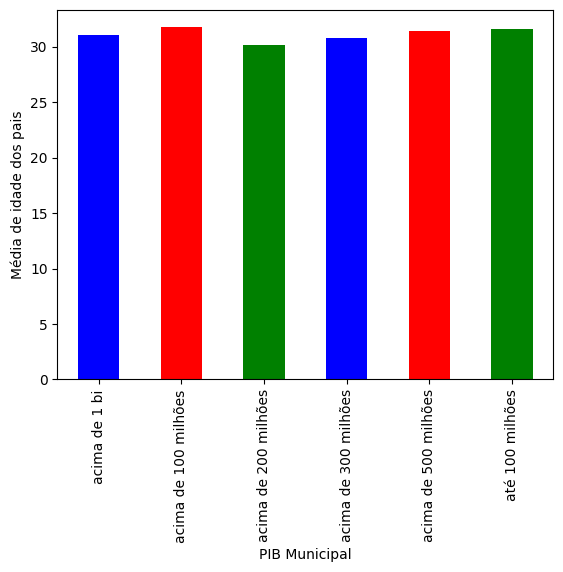

In [32]:
sinasc2.groupby(PIB)['IDADEPAI'].mean().plot(kind='bar', color=['blue', 'red', 'green'], xlabel='PIB Municipal', ylabel='Média de idade dos pais')

In [70]:
sinasc2.groupby([PIB, 'SEXO']).count()['DTNASC'].unstack(fill_value=0)

SEXO,Feminino,Masculino
munResNome,,
acima de 1 bi,8654,9079
acima de 100 milhões,908,945
acima de 200 milhões,228,291
acima de 300 milhões,610,641
acima de 500 milhões,1637,1717
até 100 milhões,177,200


<Axes: title={'center': 'Contagem de nascidos por sexo em relação ao PIB'}, xlabel='PIB', ylabel='Nascidos'>

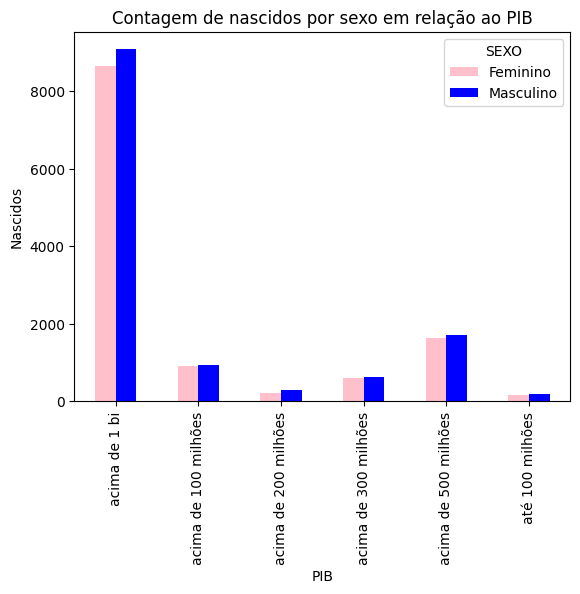

In [72]:
sinasc2.groupby([PIB, 'SEXO']).count()['DTNASC'].unstack(fill_value=0).plot(kind='bar', color=['pink', 'blue'], xlabel='PIB', ylabel='Nascidos', title='Contagem de nascidos por sexo em relação ao PIB')

Quando olhamos para idade dos pais e das mães em relação a PIB, IDH e IFDM, notamos que os pais nivelam idade mesmo com variações dos indices mencionados, porém quando olhamos para quantidade de bebes percebemos que onde o IDH é alto temos bastante bebes e no médio e baixo a queda é gritante, o mesmo acontece com IFDM Moderado que tem bastante bebes o contrário do regular, e o mesmo em relação ao PIB que somente acima de 1 bi ultrapassa os 300 em número de bebes.

Concluo Afirmando a população onde o desenvolvimento humano não é alto, o desenvolvimento municipal não é moderado e o PIB não fica acima de 1 BI, a tendencia é que tenham sempre menos bebes, sejam por razões econômicas, estrutura ou populacional.